In [26]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard

In [27]:
#the path of images on disk
TRAIN_DIR='/home/tasneem/Downloads/PH2.16/train'
VALID_DIR='/home/tasneem/Downloads/PH2.16/valid/'
TEST_DIR='/home/tasneem/Downloads/PH2.16/test/'

IMAGE_SIZE=200

In [28]:
def classNum():
    # useful for getting number of files
    image_files = glob(TRAIN_DIR + '/*/*.bmp')
    valid_image_files = glob(VALID_DIR + '/*/*.bmp')
    # getting the number of classes i.e. type of fruits
    folders = glob(TRAIN_DIR + '/*')
    num_classes = len(folders)
    print ('Total Classes = ' + str(num_classes))

In [29]:
train_batches= ImageDataGenerator().flow_from_directory(TRAIN_DIR,
                                                 target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 40,
                                                class_mode='categorical')
valid_batches= ImageDataGenerator().flow_from_directory(VALID_DIR,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='categorical')
test_batches= ImageDataGenerator().flow_from_directory(TEST_DIR, target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='categorical')



def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
      if type(ims[0]) is np.ndarray:
            ims= np.array(ims).astype(np.uint8)
            if (ims.shape[-1] != 3):
                ims = ims.transpose((0,2,3,1))
            f = plt.figure(figsize=figsize)
            cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
            for i in range(len(ims)):
                sp=f.add_subplot(rows, cols, i+1)
                sp.axis('Off')
                if titles is not None:
                    sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 160 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [30]:
imgs, labels = next(train_batches)

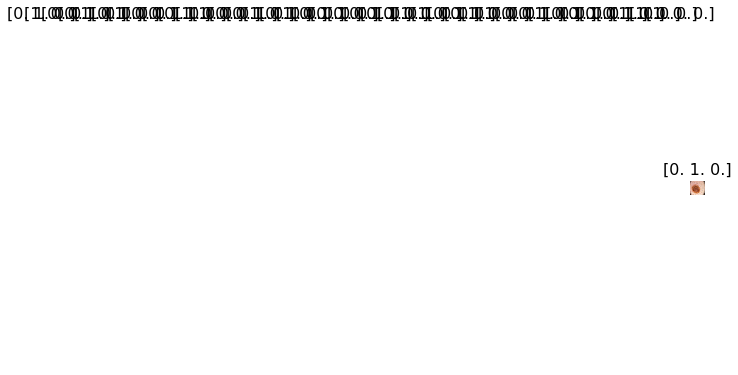

In [31]:
plots(imgs,titles=labels)

In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation ='softmax'))

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
#//هنا نسوي call للداتاسيت ترين
#model.fit(train_batches, valid_batches, epochs=15 , batch_size=41)

#model.fit(TRAIN_DIR, train_batches, batch_size=41, epochs=15, verbose=1,
          #validation_data=(VALID_DIR, valid_batches), callbacks=[])
    
#model.fit(train_batches, valid_batches, batch_size=41, epochs=3, validation_split=0.3)
history = model.fit_generator(train_batches, 
				 	steps_per_epoch=3,
				 	epochs=30,
					validation_data=valid_batches,
					validation_steps=1,
					)

model.summary()

Epoch 1/30
3/3 [==============================] - 2s 515ms/step - loss: 9.5172 - acc: 0.3750 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 88ms/step - loss: 10.8797 - acc: 0.3250 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 3/30
3/3 [==============================] - 0s 84ms/step - loss: 9.5365 - acc: 0.4083 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/30
3/3 [==============================] - 0s 86ms/step - loss: 10.2081 - acc: 0.3667 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 5/30
3/3 [==============================] - 0s 86ms/step - loss: 9.5365 - acc: 0.4083 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 6/30
3/3 [==============================] - 0s 84ms/step - loss: 9.1336 - acc: 0.4333 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 7/30
3/3 [==============================] - 0s 83ms/step - loss: 10.3424 - acc: 0.3583 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 8/30
3/3 [==============================] - 0s 84ms/step - loss: 9.1336 - acc: 0.433